# GroupBy

"Group by" operations refers to an implementation of the "split-apply-combine" approach known from [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) and [xarray](http://xarray.pydata.org/en/stable/groupby.html).
We currently support only a limited number of operations that can be applied.

## Grouping with bins

Note that this notebooks requires [Mantid](https://www.mantidproject.org/Main_Page) and data files.
A [binder](https://mybinder.org/v2/gh/scipp/scipp-neutron-jupyter-demo/master) is available that can run this notebook.

In [1]:
import numpy as np
import scipp as sc
from scipp import Dim

In [2]:
events = sc.neutron.load(filename='PG3_4844_event.nxs', load_pulse_times=False)

### Example 1 (dense data): split-sum-combine

We histogram the sparse (event) data:

In [3]:
bins = sc.Variable([Dim.Tof], values=np.arange(0.0, 17000.0, 50.0), unit=sc.units.us)
pos_hist = sc.histogram(events, bins)

A plot shows the shortcoming of the data representation.
There is no physical meaning attached to the "spectrum" dimension and the plot is hard to interpret:

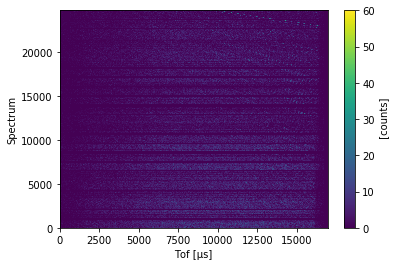

In [4]:
sc.plot.plot(pos_hist)

To improve the plot, we store first the scattering angle as labels in the data array.
Then we create a variable containing the desired target binning:

In [5]:
pos_hist.labels['scattering_angle'] = sc.neutron.scattering_angle(pos_hist)
theta = sc.Variable([Dim.ScatteringAngle],
                    unit=sc.units.rad,
                    values=np.linspace(0.0, np.pi/2, num=500))

We use `scipp.groupby` with the desired bins and apply a `sum` over `Dim.Spectrum`:

In [6]:
theta_hist = sc.groupby(pos_hist, 'scattering_angle', bins=theta).sum(Dim.Spectrum)

The result has `Dim.Spectrum` replaced by the physically meaningful `Dim.ScatteringAngle` and the resulting plot is easily interpretable:

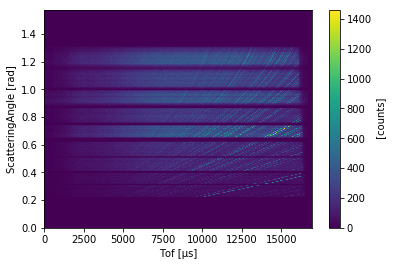

In [7]:
sc.plot.plot(theta_hist)

### Example 2 (sparse data): split-flatten-combine

This is essentially the same as example 1 but avoids histogramming data too early.
A plot of the original data is hard to interpret:

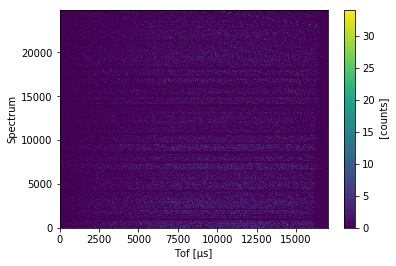

In [8]:
sc.plot.plot(events, bins=np.linspace(0.0, 17000.0, 1000))

To improve the plot, we store first the scattering angle as labels in the data array.
Then we create a variable containing the desired target binning:

In [9]:
events.labels['scattering_angle'] = sc.neutron.scattering_angle(events)
theta = sc.Variable([Dim.ScatteringAngle],
                    unit=sc.units.rad,
                    values=np.linspace(0.0, np.pi/2, num=500))

We use `scipp.groupby` with the desired bins and apply a `flatten` `Dim.Spectrum`.
This is the sparse-data equivalent to summing histograms:

In [10]:
theta_events = sc.groupby(events, 'scattering_angle', bins=theta).flatten(Dim.Spectrum)

The result has `Dim.Spectrum` replaced by the physically meaningful `Dim.ScatteringAngle` and the resulting plot is easily interpretable:

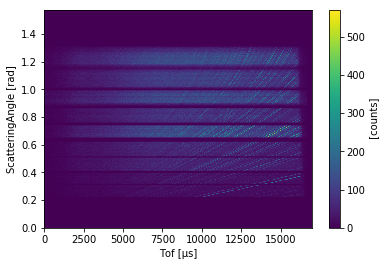

In [11]:
sc.plot.plot(theta_events, bins=np.linspace(0.0, 17000.0, 1000))